# Base para Sprint 3

- Usar incluir 4 variables explicativas (Buscamos velocidad)
- Mucho ojo a la calidad de los datos, el ingeniero de datos DEBE entregar una tabla maestra única, con datos correctos, en el tipo correcto y que representen el negocio.

In [ ]:
# !pip install -r requirements.tx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import ml_functions

# Pipeline

## Sprint 3

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X['categorical_column'] = np.random.choice(['A', 'B', 'C'], X.shape[0])
y = data.target
X['mes'] = np.random.choice(['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912'], X.shape[0])
pd.Series(y).value_counts()
X.head()

df = X
df['target'] = y
df.head()


import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [3]:
# df = read_table('sandbox', 'churn')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,B,201910,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,A,201912,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,C,201910,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,B,201906,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,C,201901,0


La tabla debe tener todas las variables explicativas en su versión presente y 2fw

In [4]:
numerical_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
categorical_features = ['categorical_column']
month_feature = 'mes'
scoring_month = '201912' # df[month_feature].max()
validation_month = '201911' # df[df[month_feature] < scoring_month][month_feature].max()

In [5]:
df_adhoc = ml_functions.stratified_ad_hoc(df, categorical_features, 0.99)
print(df_adhoc.shape)

(563, 33)


Con las dos funciones siguientes el Ingeniero de datos debe garantizar:

- Que las variables categóricas no tengan alta cardinalidad
- Que los tipos de datos sean correctos
- Que las variables tengan sentido en el negocio
- Que las variables no tengan valores nulos excesivos ni ilógicos
- Que la distribución de las variables sea similar en los periodos, y si se ha rpesentado algún cambio sea producto de un cambio en el negocio y no de un error en la captura de datos.

In [24]:
ml_functions.descriptive(df_adhoc, 'target')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
train_df, validation_df, scoring_df, cv_df = ml_functions.cross_validation_sampling(df_adhoc, 'target', 5, 'roc_auc', month_feature, scoring_month, validation_month)
train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576,C,201905,1
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262,B,201901,1
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,408.3,0.10760,0.06791,0.00000,0.00000,0.2710,0.06164,C,201902,1
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,...,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870,C,201908,0
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,A,201909,1


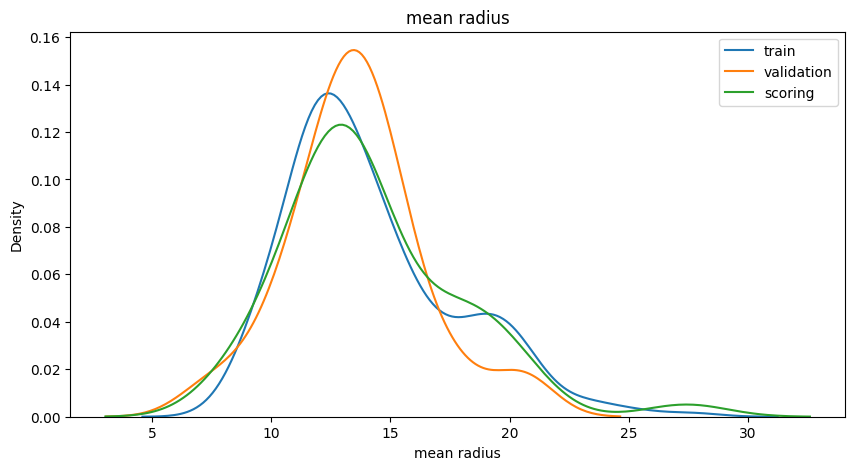

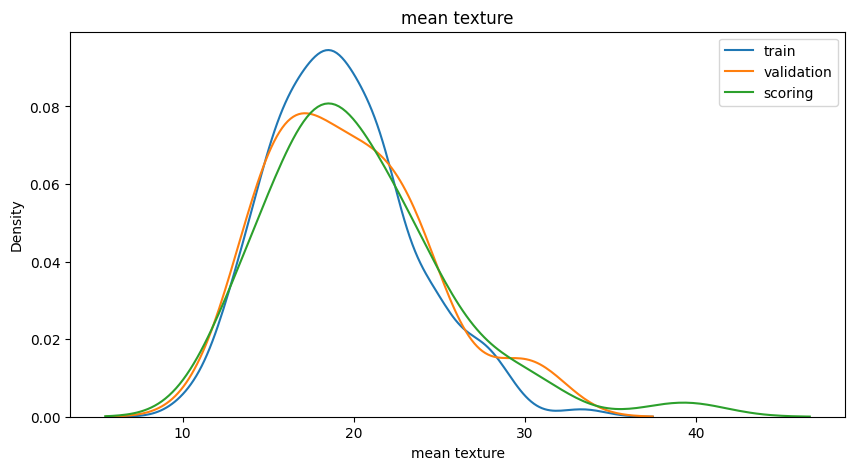

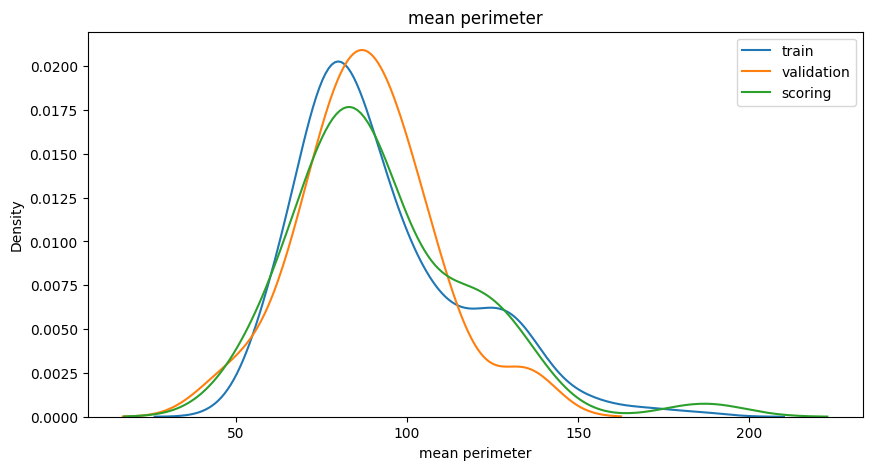

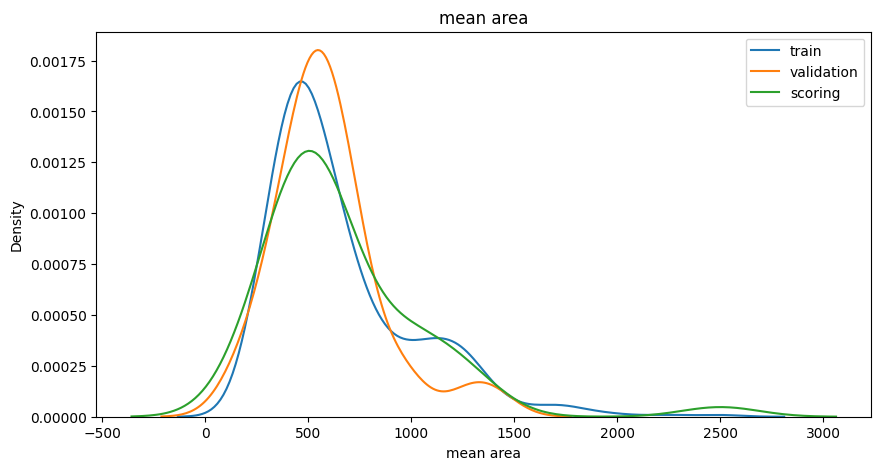

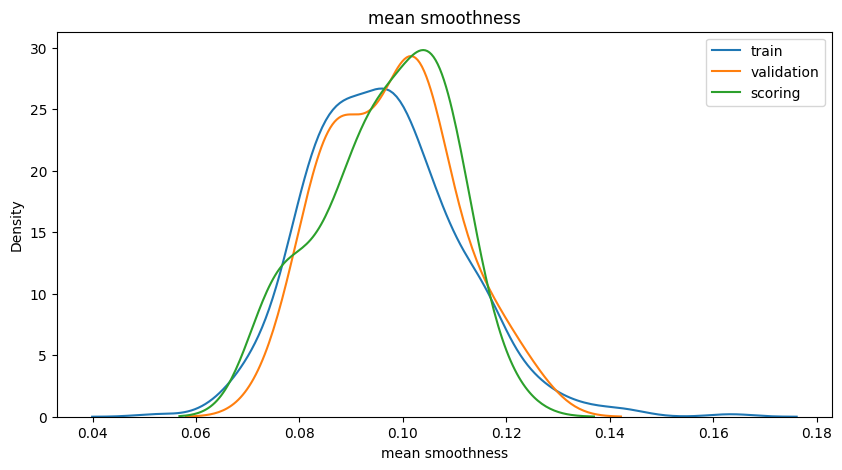

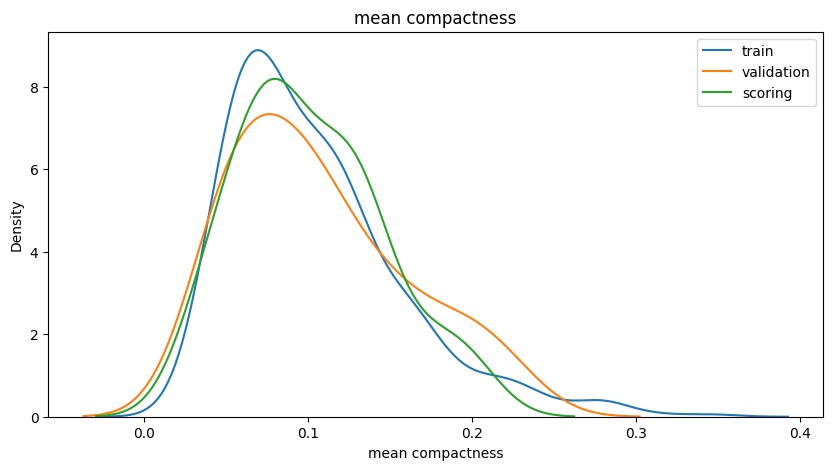

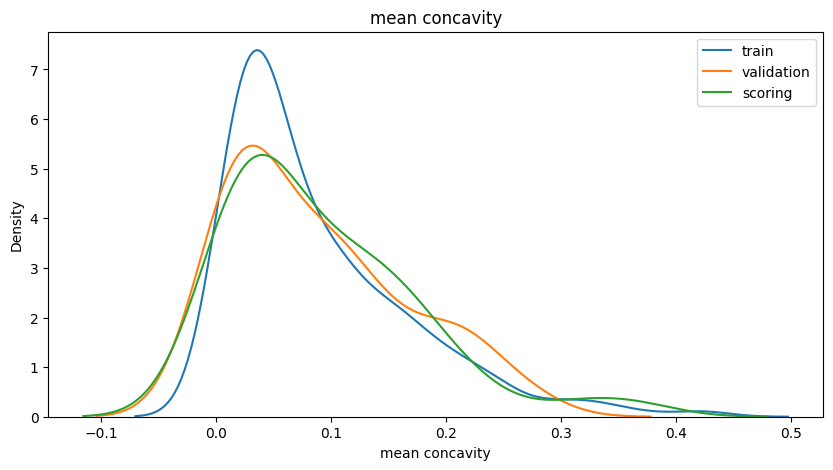

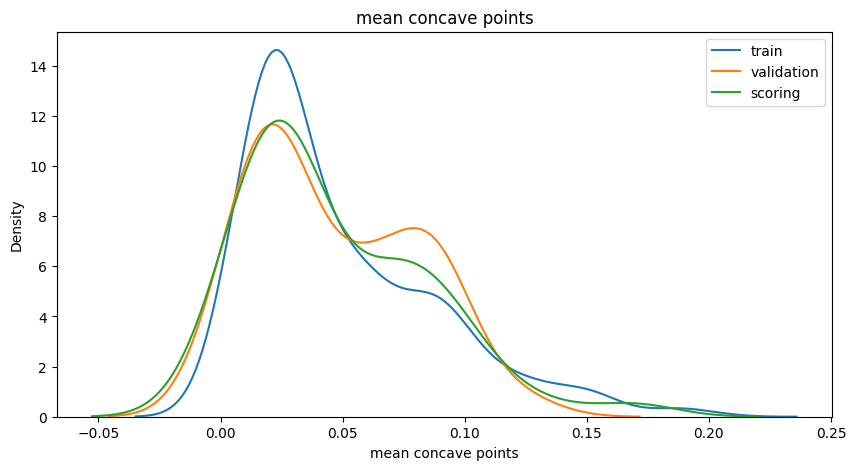

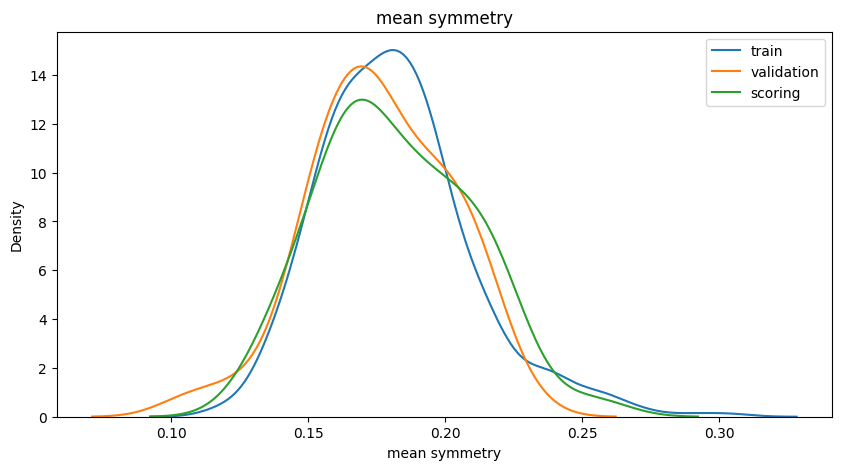

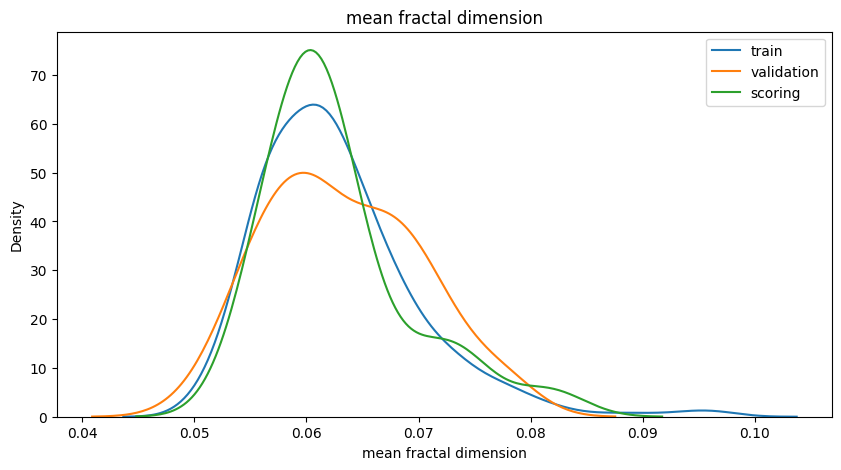

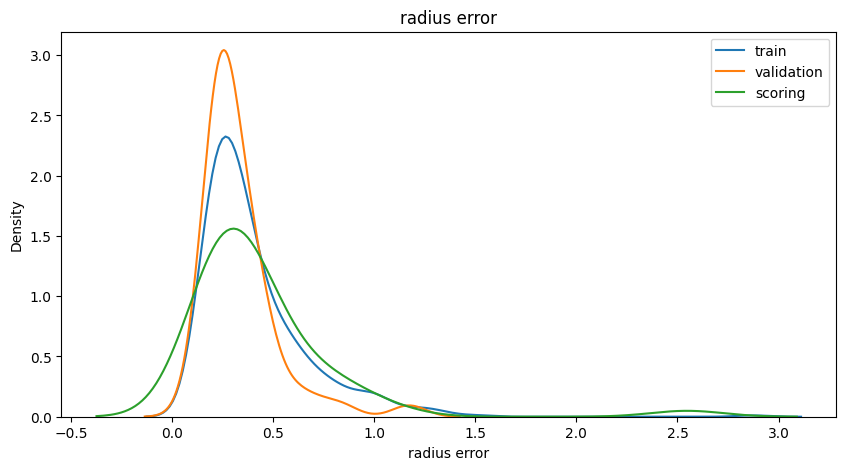

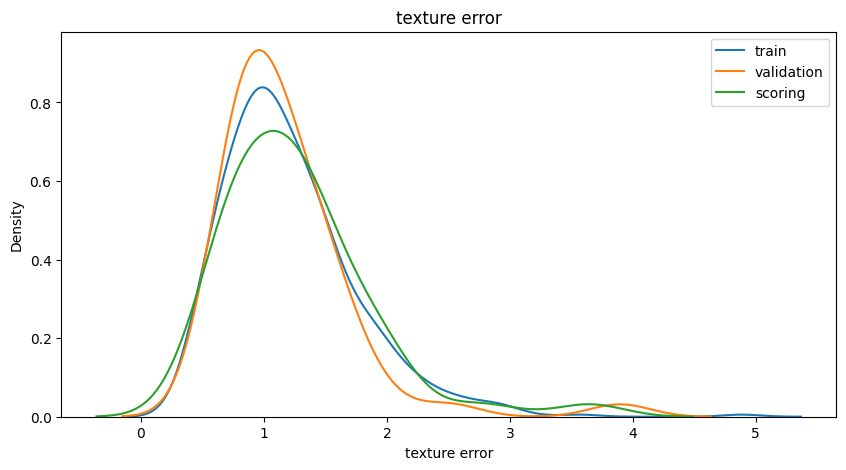

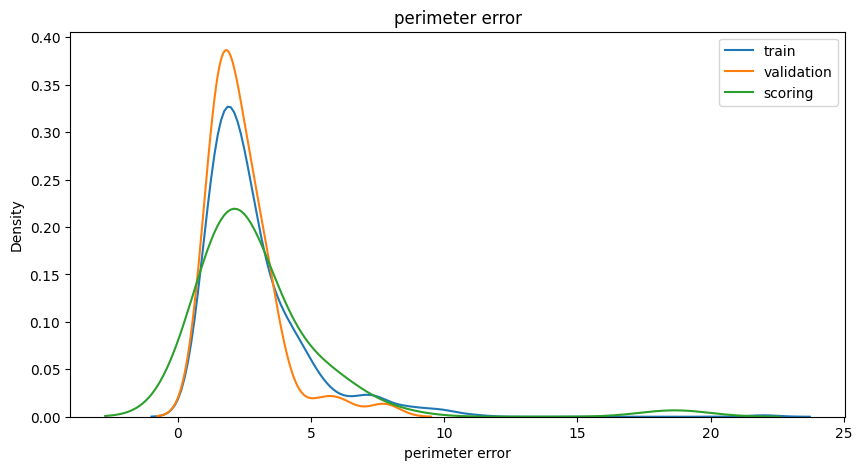

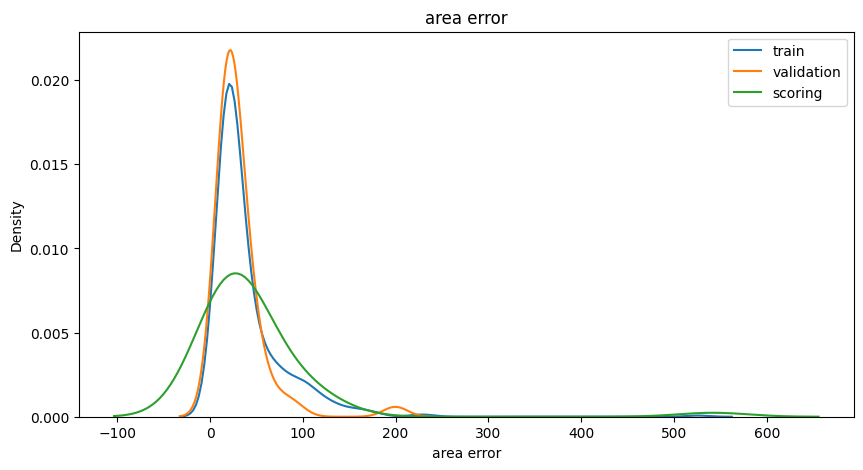

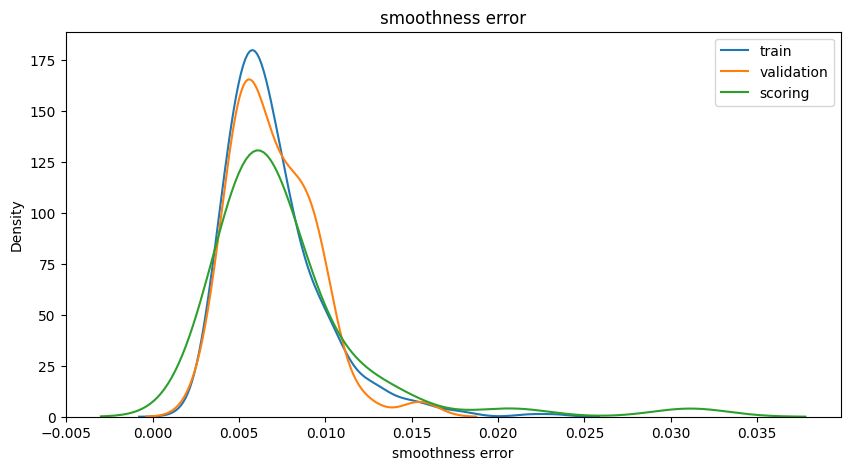

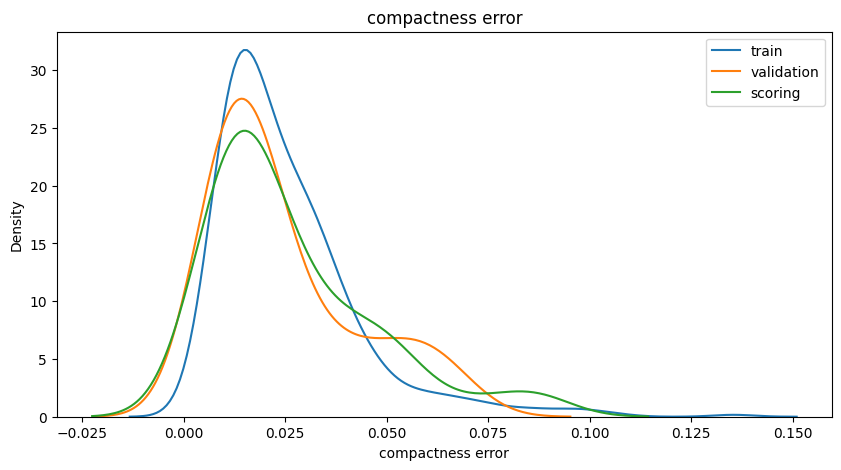

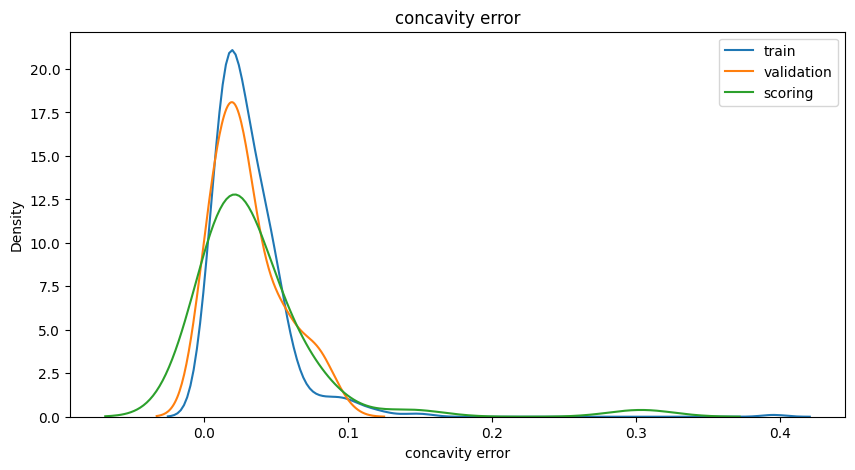

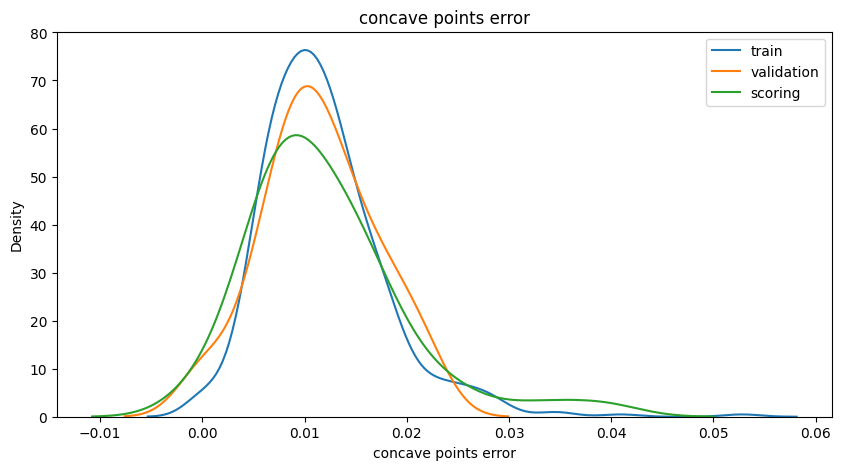

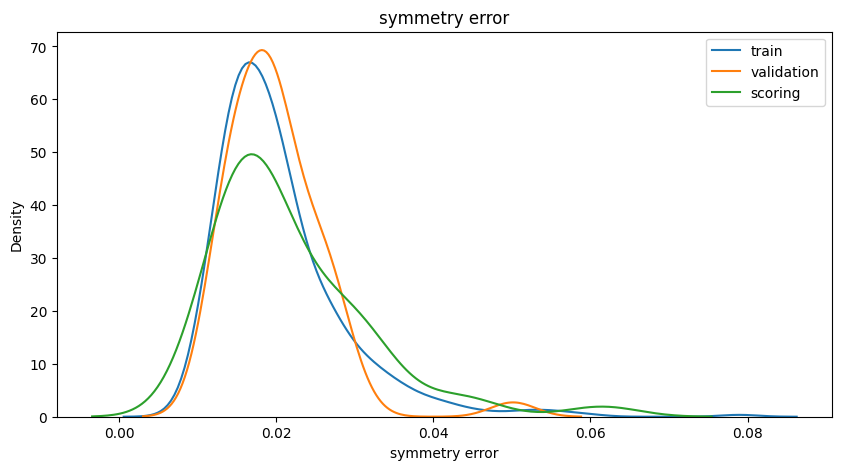

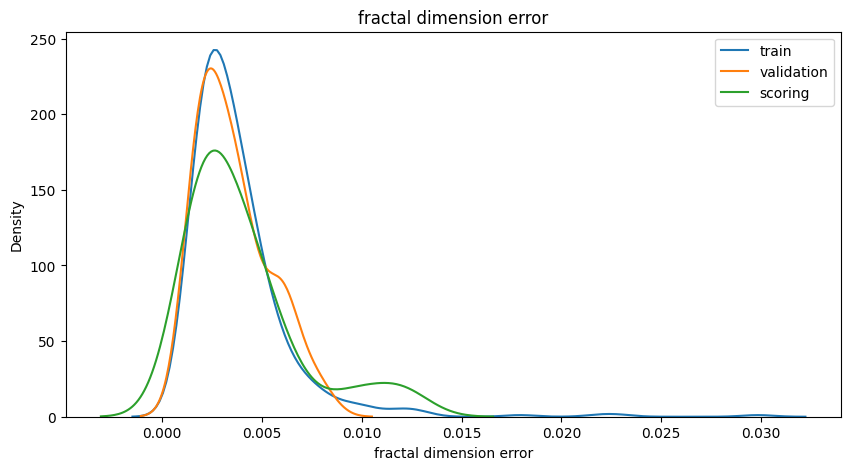

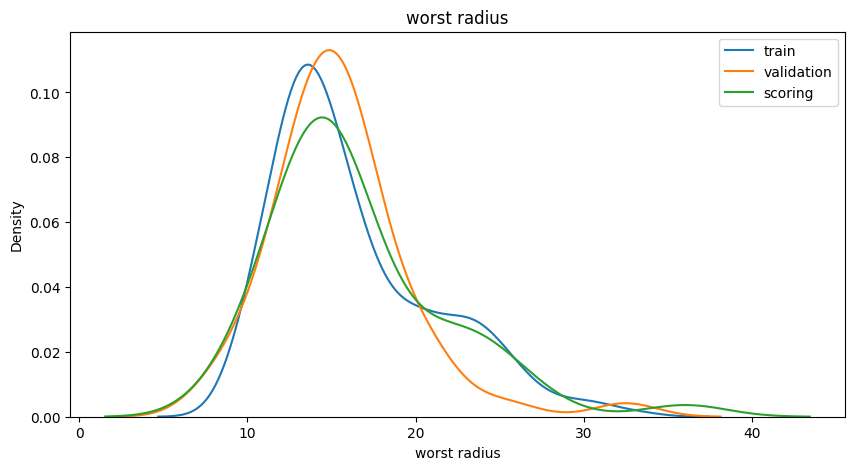

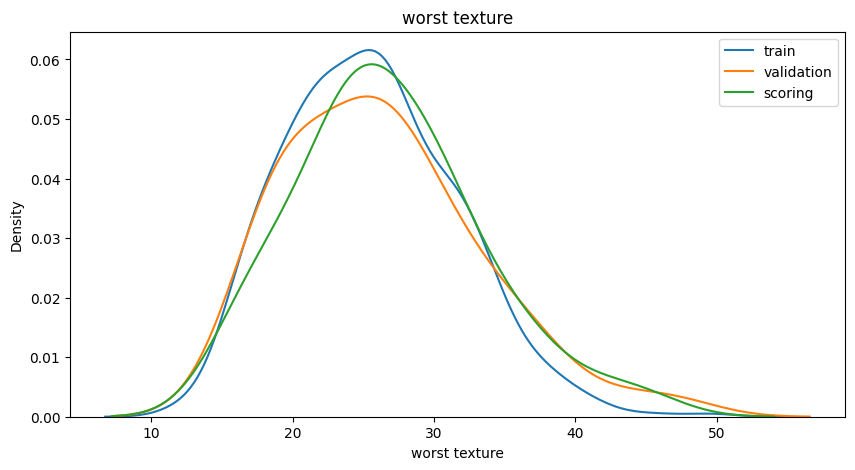

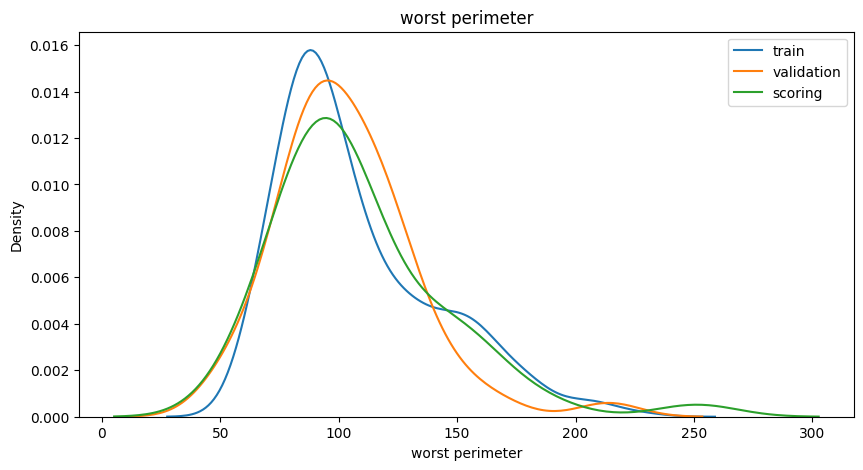

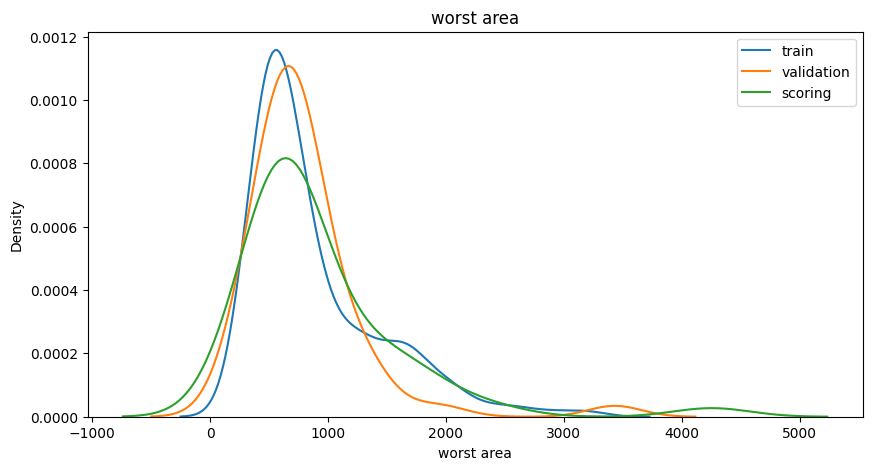

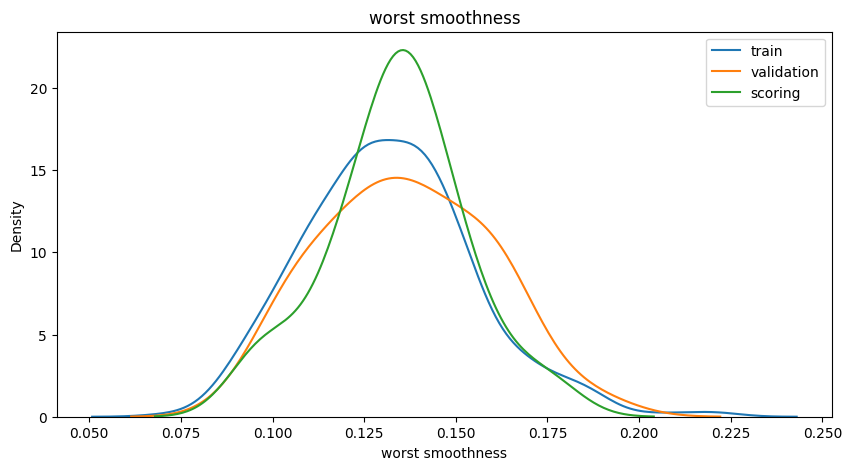

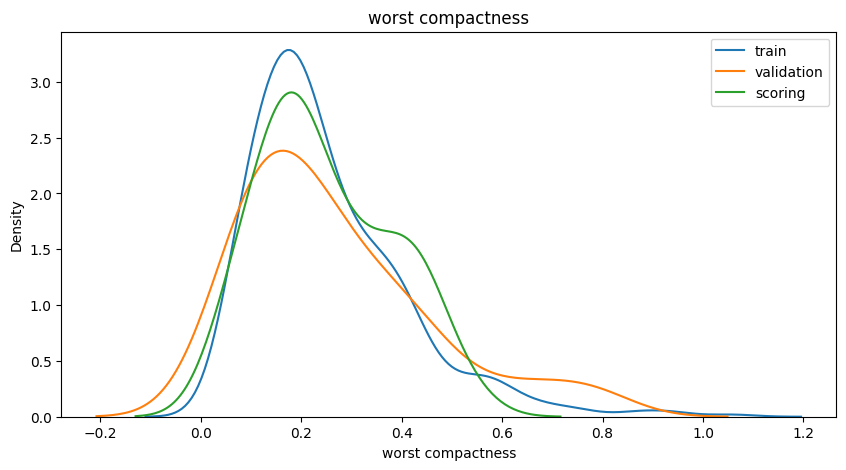

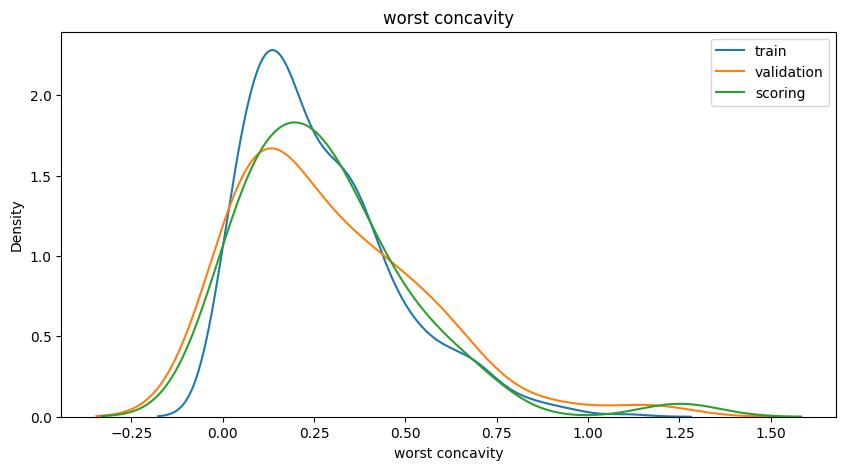

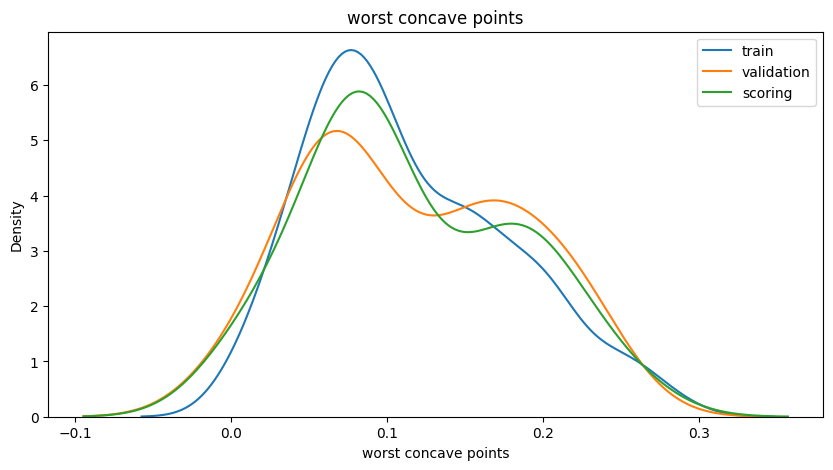

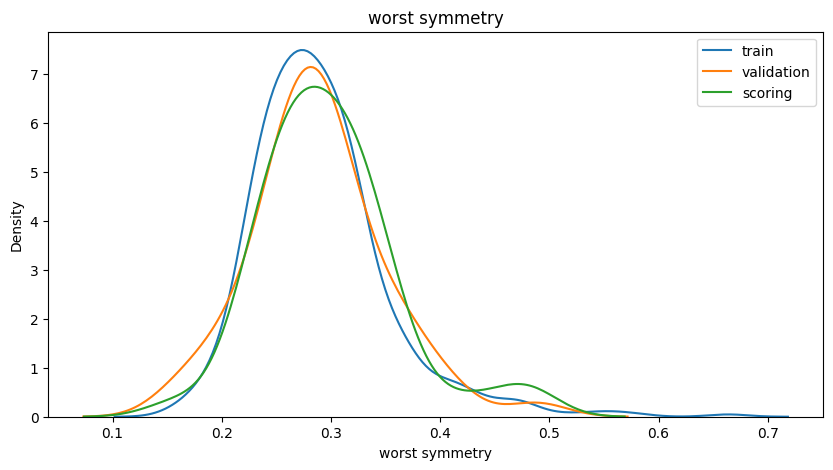

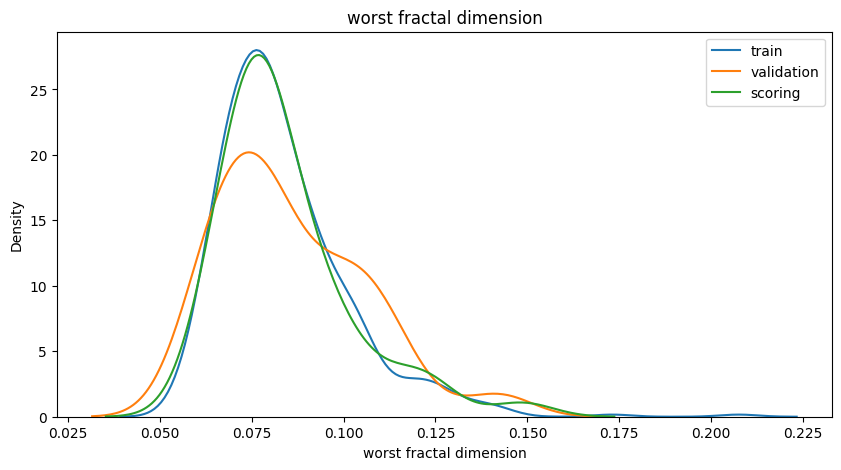

,train_nulls,validation_nulls,scoring_nulls
mean radius,0,0,0
mean texture,0,0,0
mean perimeter,0,0,0
mean area,0,0,0
mean smoothness,0,0,0


In [7]:
data_quality_nulls, data_quality_dtypes  = ml_functions.nulls_per_df(train_df, validation_df, scoring_df, numerical_features)
data_quality_nulls.head()

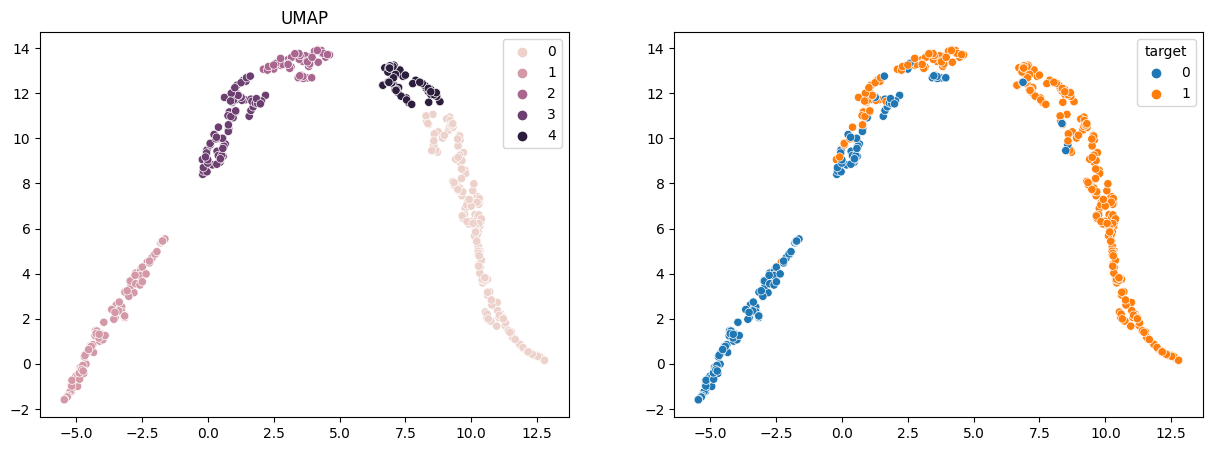

In [8]:
cluster_labels, reduced_data, df_no_outliers = ml_functions.umap_dbscan_outliers(train_df, numerical_features, 15, 5, 0.5)

In [9]:
train_df = ml_functions.replace_outliers_with_nan(df_no_outliers, numerical_features)

train_df.isnull().sum().sort_values(ascending=False)

compactness error          10
symmetry error              9
mean compactness            9
worst compactness           8
worst area                  8
fractal dimension error     8
mean concavity              8
smoothness error            8
perimeter error             7
texture error               7
mean fractal dimension      7
mean area                   7
radius error                6
area error                  6
worst fractal dimension     6
worst symmetry              6
mean symmetry               5
mean concave points         5
mean smoothness             5
concave points error        5
mean perimeter              5
concavity error             5
worst concavity             4
mean radius                 4
worst perimeter             4
worst smoothness            3
worst radius                3
mean texture                3
worst texture               2
worst concave points        0
categorical_column          0
mes                         0
target                      0
dtype: int

mean: 0.993208 (0.006594)
median: 0.993591 (0.006126)
most_frequent: 0.993969 (0.005677)
knn: 0.992537 (0.007531)


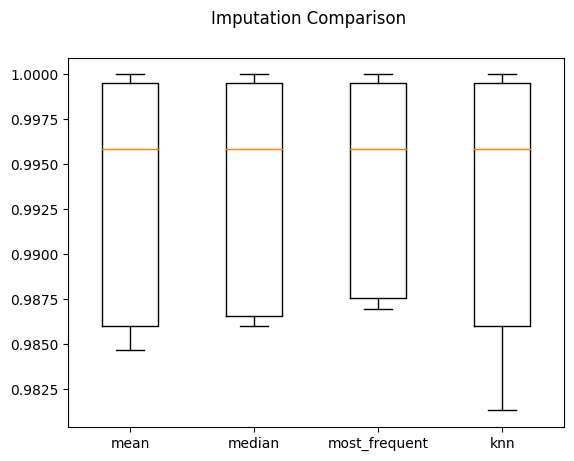

In [10]:
ml_functions.imputation_comparison(train_df, 'target', numerical_features, cv_df, miss_forest=False)

In [11]:
selected_imputer = 'knn'

In [12]:
train_df_imputed = ml_functions.apply_imputation(train_df, numerical_features, selected_imputer)
train_df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,489.5,0.13560,0.10000,0.08803,0.04306,0.3200,0.06576,C,201905,1
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262,B,201901,1
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,408.3,0.10760,0.06791,0.00000,0.00000,0.2710,0.06164,C,201902,1
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,...,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870,C,201908,0
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,A,201909,1


StandardScaler: 0.996127 (0.005432)
MinMaxScaler: 0.992537 (0.007531)
MaxAbsScaler: 0.991756 (0.008487)
RobustScaler: 0.995826 (0.005540)
Normalizer: 0.972763 (0.021788)
PowerTransformer: 0.995600 (0.004448)


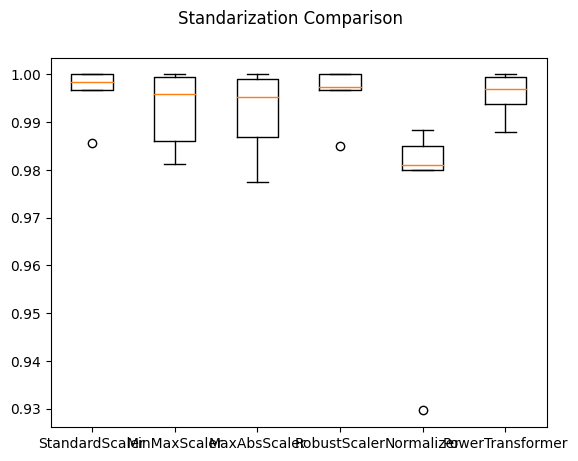

In [13]:
ml_functions.standarization_comparison(train_df_imputed, cv_df, 'target', numerical_features, scoring_metric = 'roc_auc_ovo')

In [14]:
selected_standarization = 'StandardScaler'

onehot:0.516226 (0.029979)
target:0.500000 (0.000000)
binary:0.519782 (0.040764)
ordinal:0.484907 (0.020462)
hashing:0.519157 (0.029771)
helmert:0.528424 (0.041773)
sum:0.505792 (0.035537)
polynomial:0.523635 (0.043618)
backward:0.516226 (0.029979)
base:0.519782 (0.040764)
catboost:0.500000 (0.000000)
james:0.500000 (0.000000)
mestimator:0.500000 (0.000000)
woe:0.492154 (0.015692)
count:0.490111 (0.025763)
leave:0.500000 (0.000000)


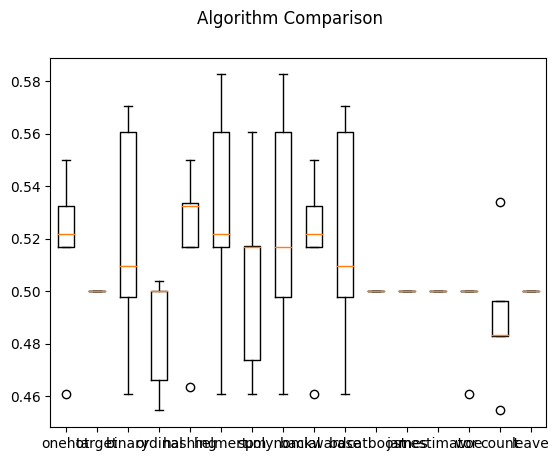

In [15]:
ml_functions.compare_encoders(train_df_imputed, cv_df, 'target', categorical_features, scoring_metric = 'roc_auc_ovo')

In [16]:
selected_encoder = 'binary'

random:0.996310 (0.002033)
smote:0.995729 (0.002532)
adasyn:0.995047 (0.002353)
borderline:0.995504 (0.003777)
svm:0.996598 (0.003102)
kmeans:0.997551 (0.002451)
smotetomek:0.996757 (0.002451)


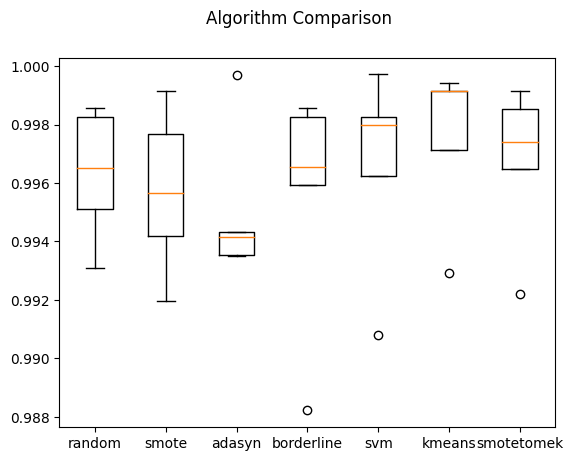

In [17]:
ml_functions.compare_balancing(train_df_imputed, cv_df, 'target', numerical_features, categorical_features, selected_standarization, selected_encoder, metric='roc_auc_ovo')

In [18]:
selected_balancing = 'smotetomek'

In [19]:
X_train, y_train, X_validation, y_validation, X_scoring = ml_functions.data_preparation(train_df_imputed, 'target', validation_df, scoring_df, numerical_features, categorical_features, selected_standarization, selected_encoder, selected_balancing)

Pre-balancing
1    295
0    172
Name: target, dtype: int64
Post-balancing
1    295
0    295
Name: target, dtype: int64


In [20]:
X_train_poly, X_validation_poly, X_scoring_poly = ml_functions.polynomial_features(X_train, X_validation, X_scoring, 2)

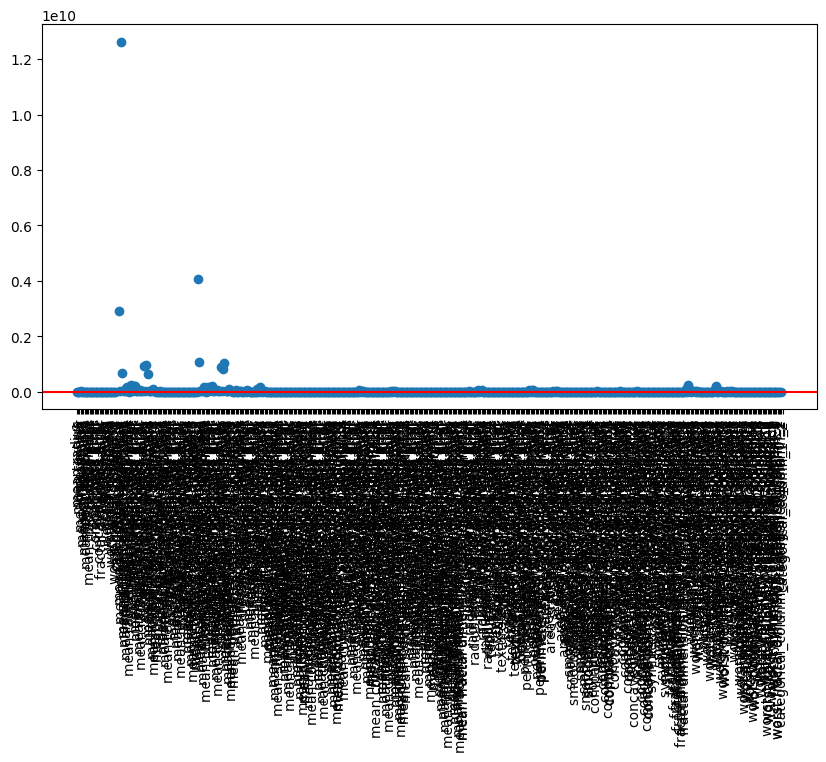

Original data: Lasso AUC score in kfold test:  0.9995518529158288
Original data: Lasso AUC score in validation:  0.9596273291925466
VIF reduced data: Lasso AUC score in kfold test:  0.9995518529158288
VIF reduced data: Lasso AUC score in validation:  0.9596273291925466
['1', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'categorical_column_0', 'categorical_column_1', 'mean radius^2', 'mean radius mean texture', 'mean radius mean perimeter', 'mean radius mean area', '

In [21]:
selected_features = ml_functions.vif_filter(X_train_poly, y_train, X_validation_poly, y_validation, cv_df, 10)
print(selected_features)
X_train = X_train_poly[selected_features]
X_validation = X_validation_poly[selected_features]
X_scoring = X_scoring_poly[selected_features]

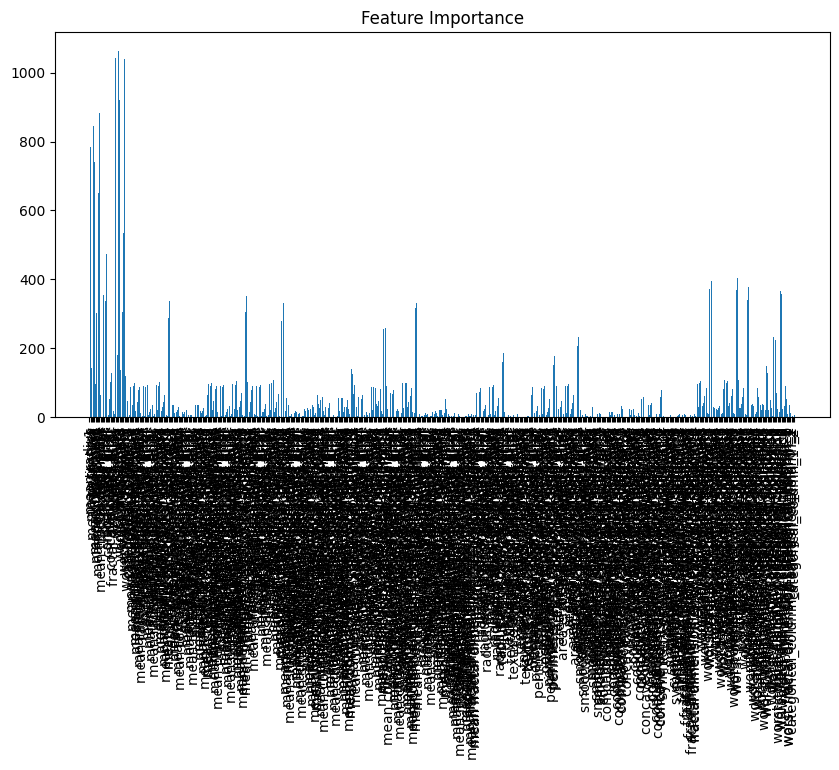

Original data: Lasso AUC score in kfold test:  0.9995518529158288
Original data: Lasso AUC score in validation:  0.9596273291925466
F-Filter reduced data: Lasso AUC score in kfold test:  0.9889686871588623
F-Filter reduced data: Lasso AUC score in validation:  0.9953416149068324


Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [22]:
selected_features = ml_functions.f_filter(X_train, y_train, X_validation, y_validation, cv_df, k_features = 5)
selected_features

In [24]:
X_train = X_train[selected_features]
X_validation = X_validation[selected_features]
X_scoring = X_scoring[selected_features]

XGB: 0.987084 (0.009236)
LR: 0.989283 (0.009002)
RF: 0.987088 (0.009270)
GBM: 0.986884 (0.009793)
KNN: 0.978287 (0.011847)
NB: 0.988301 (0.009329)
DT: 0.930413 (0.015884)
NN: 0.989514 (0.008990)


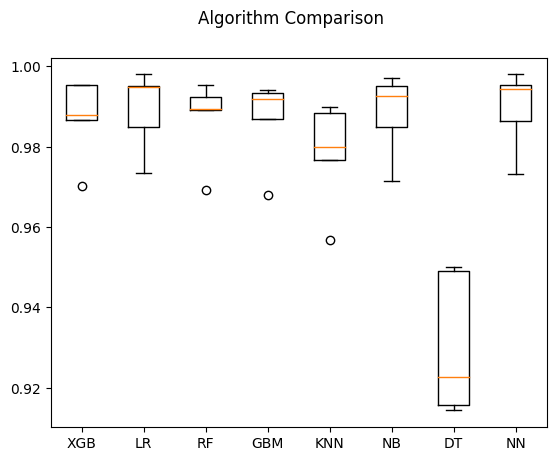

In [25]:
ml_functions.model_comparison(X_train, y_train, cv_df, scoring_metric = 'roc_auc_ovo')

In [26]:
selected_model = 'LR'

In [27]:
model, metrics = ml_functions.model_training(X_train, y_train, X_validation, y_validation, selected_model, 'target', 'roc_auc_ovo', cv_df)

Accuracy: 0.9607843137254902
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1: 0.9642857142857143
ROC AUC: 0.9604037267080746
Confusion matrix: [[22  1]
 [ 1 27]]
Overfitting: -0.0474576271186441


  0%|          | 0/51 [00:00<?, ?it/s]

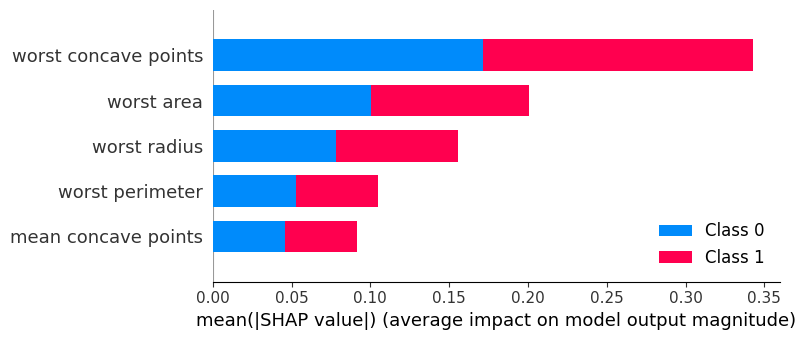

In [28]:
ml_functions.shap_values_importance(model, X_train, X_validation, y_train, y_validation)

In [29]:
ml_functions.precision_threshold(model, X_train, y_train, X_validation, y_validation)

Validation data:
                           TP  Total  Precision  FP  FPR    Value  Count_0  \
decile                                                                       
(-0.00099999485, 0.00685]   0      6        0.0   6  1.0  0.00685        6   
(0.00685, 0.0329]           0      5        0.0   5  1.0  0.03290        5   
(0.0329, 0.0822]            0      5        0.0   5  1.0  0.08220        5   
(0.0822, 0.323]             0      5        0.0   5  1.0  0.32300        5   
(0.323, 0.921]              3      5        0.6   2  0.4  0.92100        2   
(0.921, 0.975]              5      5        1.0   0  0.0  0.97500        0   
(0.975, 0.991]              5      5        1.0   0  0.0  0.99100        0   
(0.991, 0.996]              5      5        1.0   0  0.0  0.99600        0   
(0.996, 0.999]              5      5        1.0   0  0.0  0.99900        0   
(0.999, 1.0]                5      5        1.0   0  0.0  1.00000        0   

                           Count_1    Perc_0  

In [30]:
low_threshold = 0.2
high_threshold = 0.5

In [31]:
predictions = ml_functions.model_predictions(model, X_scoring, low_threshold, high_threshold)
predictions.head()

,prediction,probability
0,1.0,0.919350
1,1.0,0.993295
2,1.0,0.989507
3,1.0,0.999318
4,1.0,0.912531


In [32]:
predictions[predictions['prediction'].isnull()]

,prediction,probability
14,NaN,0.211046


In [33]:
predictions_calibrated = ml_functions.calibrated_probabilities(model, X_train, y_train, X_validation, X_scoring, cv_df)
predictions_calibrated

{'train': array([9.89996071e-01, 9.66828322e-01, 9.98019663e-01, 9.34985023e-04,
        9.36423708e-01, 9.81698941e-01, 9.63163619e-01, 2.10532788e-02,
        9.07425085e-01, 9.74963093e-01, 4.30550703e-03, 8.71337701e-01,
        7.53758251e-01, 9.20841301e-01, 9.62288296e-01, 2.72968694e-02,
        9.12541075e-01, 9.68678376e-01, 9.36861455e-01, 4.75717602e-01,
        9.99001102e-01, 6.42199182e-01, 5.22101528e-04, 1.59761913e-03,
        3.53561798e-01, 9.73109817e-01, 5.55266802e-02, 9.73761762e-01,
        9.94704960e-01, 8.22836178e-01, 9.99104157e-01, 9.40075032e-01,
        9.87803618e-01, 4.17065843e-01, 6.32347757e-01, 9.94569424e-01,
        5.42603549e-01, 6.83715813e-03, 9.95486031e-01, 9.72009619e-01,
        9.97314170e-01, 9.98252660e-01, 9.90656599e-01, 9.81925674e-01,
        9.98839850e-01, 9.54453610e-01, 8.02533085e-01, 9.28278080e-01,
        9.77760886e-01, 6.04306404e-05, 8.63517858e-01, 9.93764281e-01,
        1.19926658e-05, 9.84146003e-01, 2.33411859e-02,

### Piloto - Control

In [34]:
X_scoring.head()

,mean concave points,worst radius,worst perimeter,worst area,worst concave points,pred_prob,pred
0,-0.531189,-0.294614,-0.372573,-0.357772,-0.152304,0.919350,1.0
1,-0.605084,-0.804839,-0.856912,-0.757902,-0.444393,0.993295,1.0
2,-0.737346,-0.683057,-0.677145,-0.676153,-0.420512,0.989507,1.0
3,-1.299592,-0.599069,-0.676841,-0.604168,-1.752059,0.999318,1.0
4,-0.107898,-0.277816,-0.190377,-0.359686,-0.360502,0.912531,1.0


In [36]:
effect_numerical_features = ['worst radius', 'worst area']
piloto_df, piloto_control_means = ml_functions.piloto_control(X_scoring, predictions, effect_numerical_features)
piloto_df.head()
piloto_control_means.head()

,piloto_control,mean_probability,worst radius,worst area
0,control,0.634363,0.159321,0.265460
1,piloto,0.622680,-0.074795,-0.079594


### Histórico de versiones

In [37]:
ml_functions.save_model_metrics('Modelo de Churn para Mayorista', '3.0', metrics, 'Modelo de Churn para Mayorista', selected_imputer, selected_encoder, selected_balancing, selected_features, selected_model)

Modelo guardado en el excel


### Pipeline

- Llevar el código al pipeline y dejar funcionando el modelo

### Versionado en CodeCommit

- git status
- git stash
- git pull
- git stash pop
- git add .
- git commit -m "Feat (sprint_1): add classification baseline"
- git push
- git tag -a v0.1.0 -m "Feat (sprint_1): add classification baseline"
- git push origin v0.1.0
- git stash pop

### Presentación al stakeholder técnico

Se revisarán los temas:
- Modelo funcionando en todos los items del sprint 1
- Documentación completa y clara
- Código limpio y bien comentado
- Buenas prácticas de programación
- Lógica de las variables más importantes
- Versionado en CodeCommit
- Buenas prácticas de Git
- Buenas prácticas de AWS(Instancias, roles, etc)
- Métricas del modelo
- Calidad de los datos
- EDA
- Análisis de outliers
- Análisis de missing values
- Análisis de variables categóricas
- Análisis de variables numéricas
- Regularización
- Feature engineering
- Feature selection
- Entendimiento del problema
- Entendimiento de los datos
- Nombramiento correcto de variables
- Ventana de tiempo correcta
- Correcta creación de variable target
- Correcta creación de variables explicativas
- Explicación de las variables más importantes
- Explicación de las métricas del modelo
- Explicación de las métodologías seleccionadas
- Explicación de las decisiones tomadas
- Explicación de las nuevas varibles a incorporar
- Overfitting
- Pipeline de MLops

### Escritura de la documentación

- Documentación del modelo sobre la estructura del archivo 'README.md'